In [1]:
# Import the necessary packages & libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Load the data set into the pandas data frame by using read_csv command
df = pd.read_csv(r'C:\Users\ashle\Downloads\D207 Churn Dataset\d207_churn_clean.csv',
                usecols=['Churn',
                        'Outage_sec_perweek'])

In [3]:
# Run a two-sample t-test by creating groups of customer's churn with the number of seconds per week of system outages in the customer’s neighborhood
churn_yes = df[df['Churn'] == 'Yes'].Outage_sec_perweek
churn_no = df[df['Churn'] == 'No'].Outage_sec_perweek

In [4]:
# Print t-test results
ttest_result = stats.ttest_ind(churn_yes, 
                               churn_no)
print(ttest_result)

TtestResult(statistic=-0.015639241921385327, pvalue=0.98752251103374, df=9998.0)


In [5]:
# Determine whether to accept or reject the null hypothesis using alpha = 0.05
alpha = 0.05
if (ttest_result[1] < alpha):
    print(f'This is the t-test p-value: {str(ttest_result[1])} with an alpha of {str(alpha)}. \nP-value falls within 0.05 alpha: \nReject the null hypothesis.')
else:
    print(f'This is the t-test p-value: {str(ttest_result[1])} with an alpha of {str(alpha)}. \nP-value does not fall within 0.05 alpha: \nAccept the null hypothesis.')

This is the t-test p-value: 0.98752251103374 with an alpha of 0.05. 
P-value does not fall within 0.05 alpha: 
Accept the null hypothesis.


<Axes: xlabel='Outage_sec_perweek', ylabel='Churn'>

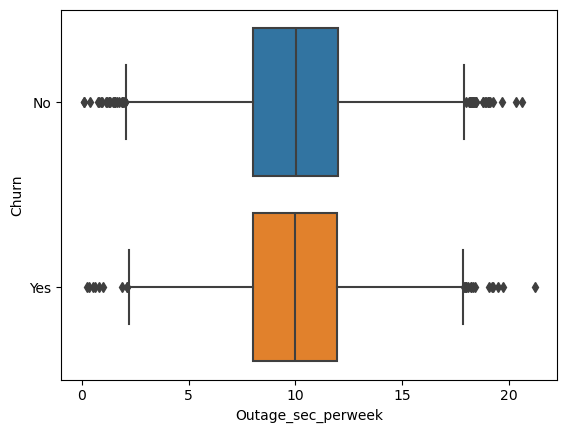

In [6]:
# Generate a boxplot of the relationship between churn and the number of seconds per week of system outages in the customer’s neighborhood
sns.boxplot(y='Churn',
           x='Outage_sec_perweek',
           data=df)

In [7]:
# Create a dataframe for the univariate statistics
df_univ = pd.read_csv(r'C:\Users\ashle\Downloads\D207 Churn Dataset\d207_churn_clean.csv',
                usecols=['Outage_sec_perweek',
                         'MonthlyCharge',
                         'Churn',
                         'Techie'])

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

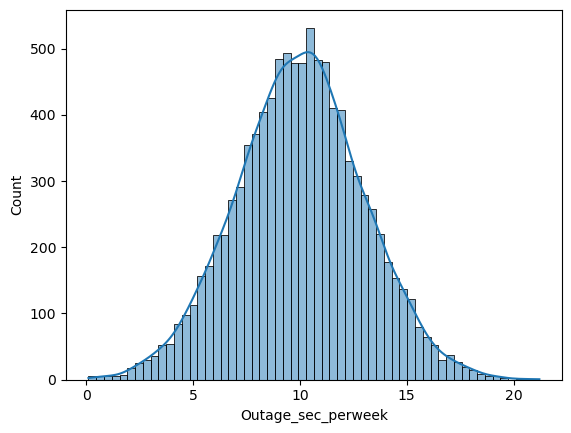

In [8]:
# Create histograms of the continuous variables
sns.histplot(x='Outage_sec_perweek', 
             data=df_univ, 
             kde=True)
df_univ.Outage_sec_perweek.describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

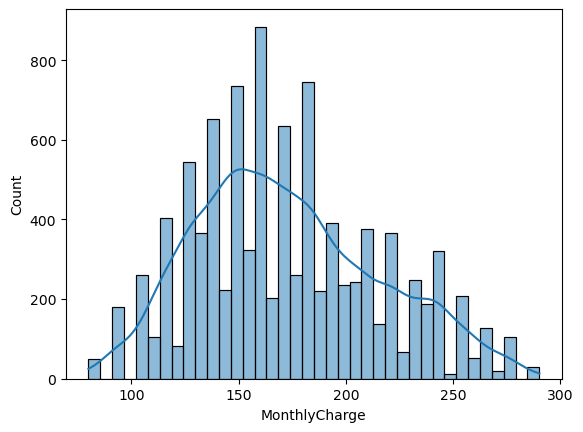

In [9]:
sns.histplot(x='MonthlyCharge',
             data=df_univ, 
             kde=True)
df_univ.MonthlyCharge.describe()

Churn
No     7350
Yes    2650
Name: count, dtype: int64

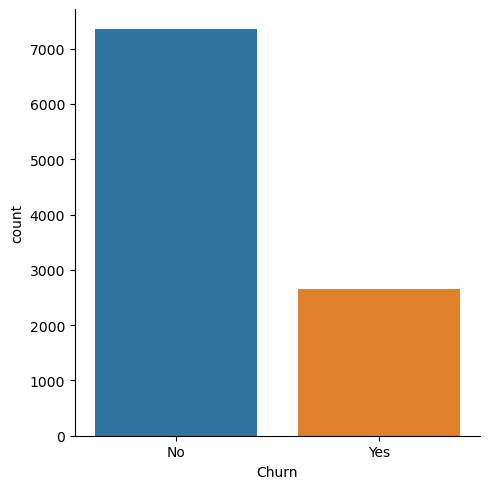

In [10]:
# Create a distribution plot of the categorical variables
sns.catplot(x='Churn',  
            data=df_univ,
            kind='count')
df_univ.Churn.value_counts()

Techie
No     8321
Yes    1679
Name: count, dtype: int64

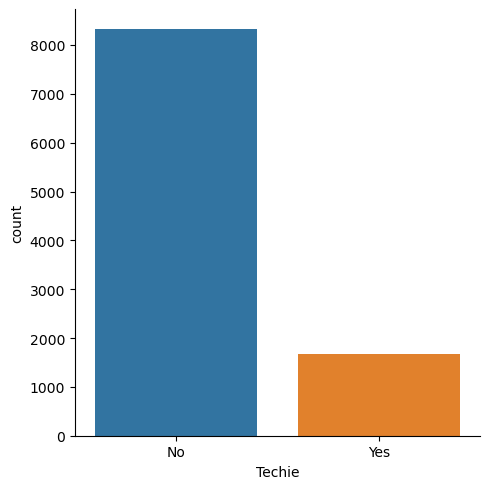

In [11]:
sns.catplot(x='Techie',  
            data=df_univ,
            kind='count')
df_univ.Techie.value_counts()

In [12]:
# Create a dataframe for the bivariate statistics 
df_biv = pd.read_csv(r'C:\Users\ashle\Downloads\D207 Churn Dataset\d207_churn_clean.csv',
                usecols=['Outage_sec_perweek',
                         'MonthlyCharge',
                         'Churn',
                         'Techie'])

Text(0.5, 1.0, 'Scatterplot of Outage_sec_perweek vs MonthlyCharge')

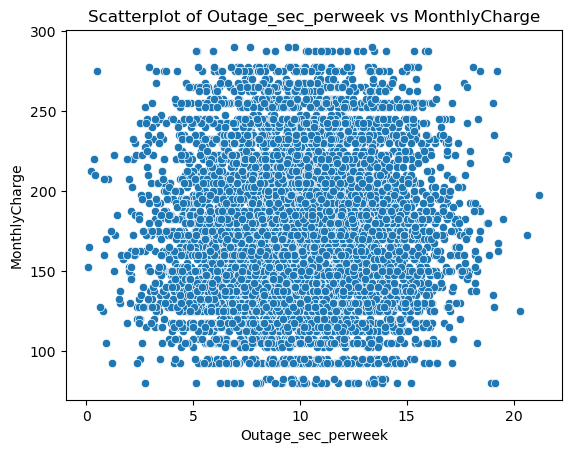

In [13]:
# Create a scatterplot of continuous variables (Outages_sec_perweek and MonthlyCharge)
sns.scatterplot(x='Outage_sec_perweek',
                y='MonthlyCharge',
                data=df_biv)
plt.title('Scatterplot of Outage_sec_perweek vs MonthlyCharge')

Techie  Churn
No      No       6226
        Yes      2095
Yes     No       1124
        Yes       555
Name: count, dtype: int64

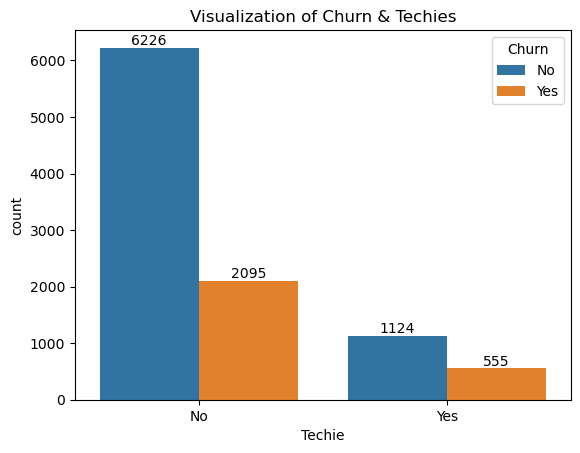

In [14]:
# Create a countplot of categorical variables (Churn and Techie)
ax = sns.countplot(x='Techie', hue= 'Churn', data= df_biv)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Visualization of Churn & Techies')
df_biv.value_counts(["Techie", "Churn"])